# Prosper Loan Data Visualization project

## Table of Contents
- [Introduction](#Introduction)
- [Gathering data](#Gathering_data)
- [Assessing data](#Assessing_data)
- [Cleaning](#Cleaning)
- [Visualization](#Visualization)
    - Univariate visualization
    - Bivariate visualization
    - Multivariate visualization
    - Exploratory visualization
- [Main_findings](#Main_findings)


## Introduction
In this project, I use Loan data from Prosper. This data set contains 113,937 loans with variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. A detailed list of the variables and their meaning is provided [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). <br><br>
I use visualization to answer the following questions:
1. Which factors affect the borrower’s interest rate?
 <br><br>
2. Which factors affect the ability of borrowers to close loans?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Gathering_data

In [2]:
df= pd.read_csv('prosperLoanData.csv')

## Assessing_data

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#View the columns
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### Cleaning Task
- not needed columns e.g ListingCreationDate, EstimatedEffectiveYield, EstimatedLoss,EstimatedReturn, CurrentlyInGroup, GroupKey, DateCreditPulled, FirstRecordedCreditLine, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ScorexChangeAtTimeOfListing, LoanFirstDefaultedCycleNumber, LoanOriginationDate, LoanOriginationQuarter, MemberKey, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors

## Cleaning

In [5]:
df_clean= df.copy()

##### Define

Drop columns that are not needed for the visualization

##### Code

In [6]:
df_clean.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'EstimatedEffectiveYield', 'EstimatedLoss', 
               'EstimatedReturn', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 
               'FirstRecordedCreditLine', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 
               'InquiriesLast6Months', 'TotalInquiries', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
               'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 
               'ProsperPaymentsOneMonthPlusLate', 'ScorexChangeAtTimeOfListing',
               'LoanFirstDefaultedCycleNumber', 'LoanOriginationDate', 
               'LoanOriginationQuarter', 'MemberKey', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
               'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 
               'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'Recommendations', 
               'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors', 'LoanKey',
               'LoanNumber', 'PercentFunded', 'AvailableBankcardCredit', 'BankcardUtilization'], axis= 1, inplace= True)

##### Test

In [7]:
df_clean.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPaymen

## Visualization

### Univariate visualization

#### 1. Distribution of Loan Original Amount 
The original amount of loans ranges across a wide range, from 1,000 USD to 35,000 USD.

In [8]:
df_clean.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

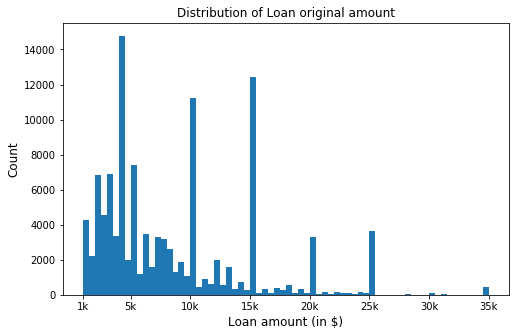

In [9]:
bins= np.arange(1000, df_clean.LoanOriginalAmount.max()+ 500, 500)
plt.figure(figsize=(8, 5))
plt.hist(data= df_clean, x= 'LoanOriginalAmount', bins= bins)
plt.title('Distribution of Loan original amount')
plt.xlabel('Loan amount (in $)', size=12)
plt.ylabel('Count', size=12)
plt.xticks([1000, 5000, 10000,15000, 20000, 25000, 30000, 35000], ['1k', '5k', '10k', '15k', '20k', '25k', '30k', '35k']);

The mode is around four thousand dollars. The distribution is right skewed, and multi-modal.

#### 2. Distribution of Monthly Loan Payment

In [10]:
df_clean.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

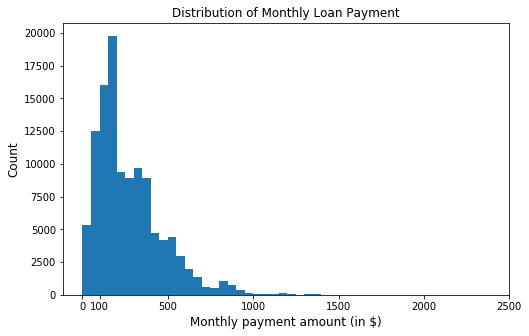

In [11]:
bins= np.arange(0, df_clean.MonthlyLoanPayment.max()+ 50, 50)
plt.figure(figsize=(8, 5))
plt.hist(data= df_clean, x= 'MonthlyLoanPayment', bins= bins)
plt.title('Distribution of Monthly Loan Payment')
plt.xlabel('Monthly payment amount (in $)', size=12)
plt.ylabel('Count', size=12)
plt.xticks([0, 100, 500, 1000,1500, 2000, 2500]);

The monthly loan payment is uni-modal, has a mode around 150 to 200 USD, and it is right skewed.

### Bivariate visualization

#### 1. Loan Amount vs Monthly payment amount
I would expect a positive relationship between the two variables

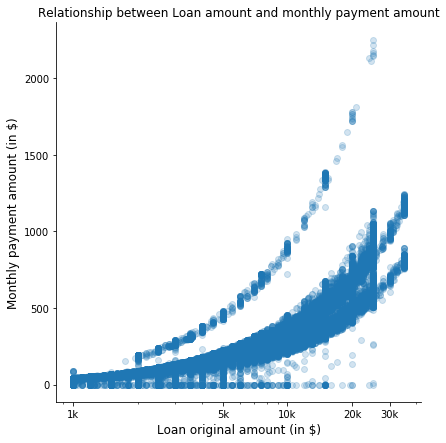

In [12]:
g= sb.FacetGrid(data=df_clean, height= 6)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment', alpha= 0.2)
g.set(xscale= 'log')
plt.xticks([1000, 5000, 10000, 20000, 30000], ['1k', '5k', '10k', '20k', '30k']);
plt.title('Relationship between Loan amount and monthly payment amount')
plt.xlabel('Loan original amount (in $)', size = 12)
plt.ylabel('Monthly payment amount (in $)', size = 12);

On average, the monthly payment amount tends to increase with the loan amount. There seems to be a subset of people who make a higher monthly payment. Let's try to find them...

#### 2. Income Range compared with loan amount and monthly payment
Do those with higher income ranges borrow larger amount or make higher monthly payments?

In [13]:
df_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [14]:
df_clean.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [15]:
#Order income range
income_classes= ['Not displayed',' Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                 '$50,000-74,999', '$75,000-99,999', '$100,000+']
income_order= pd.api.types.CategoricalDtype(ordered= True, categories= income_classes)
df_clean.IncomeRange = df_clean.IncomeRange.astype(income_order)

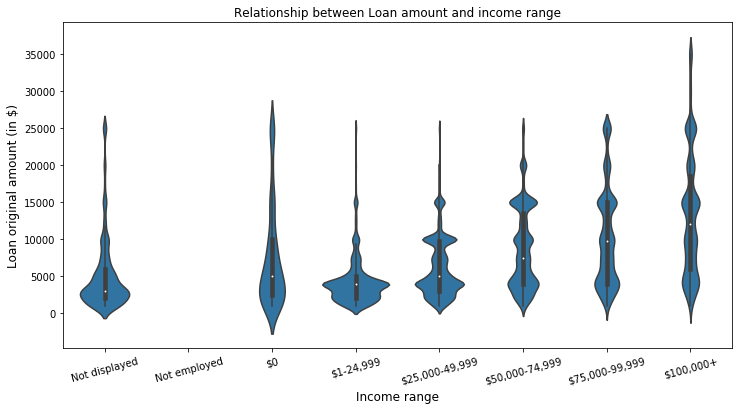

In [16]:
basecolor= sb.color_palette()[0]
plt.figure(figsize= (12,6))
sb.violinplot(data= df_clean, x='IncomeRange', y= 'LoanOriginalAmount', color= basecolor)
plt.title('Relationship between Loan amount and income range')
plt.ylabel('Loan original amount (in $)', size = 12)
plt.xlabel('Income range', size = 12)
plt.xticks(rotation= 15);

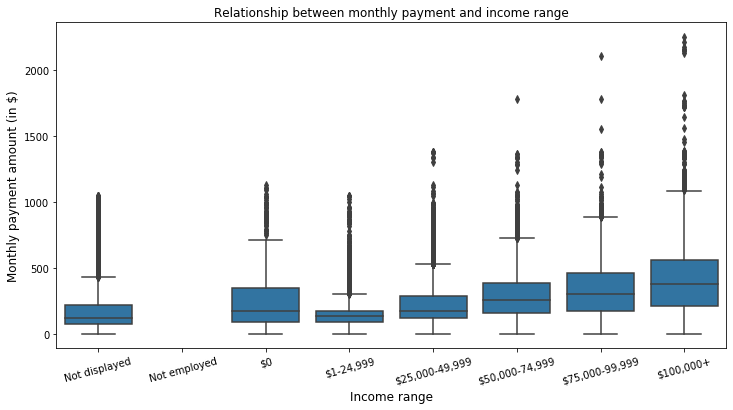

In [17]:
basecolor= sb.color_palette()[0]
plt.figure(figsize= (12,6))
sb.boxplot(data= df_clean, x='IncomeRange', y= 'MonthlyLoanPayment', color= basecolor)
plt.title('Relationship between monthly payment and income range')
plt.ylabel('Monthly payment amount (in $)', size = 12)
plt.xlabel('Income range', size = 12)
plt.xticks(rotation= 15);

It appears that the higher the income range, the higher the median loan amount and monthly payment. <br />Those who are unemployed do not have any loan amount. Meaning that their loan requests were no approved?

### Multivariate visualization

#### What factors affect a loan’s outcome status?

In [18]:
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

I use the loan status to divide the loans by their abilities to be closed, and name them Problematic and Unproblematic loans.<br>
unproblematic loans- (FinalPaymentInProgress, completed or current) <br>
problematic loans - (defaulted, past due, chargedoff)

In [19]:
#formula to differentiate problematic and unproblematic loans as loan_status_binary
def loan_status_bin(col):
    if col['LoanStatus'] == "Completed" or col['LoanStatus'] == "Current" or col['LoanStatus'] == "FinalPaymentInProgress":
        val= "unproblematic"
    elif col['LoanStatus'] == "Chargedoff" or col['LoanStatus'] == "Defaulted" or col['LoanStatus'] == "Past Due (1-15 days)" or col['LoanStatus'] == "Past Due (16-30 days)" or col['LoanStatus'] == "Past Due (31-60 days)" or col['LoanStatus'] == "Past Due (61-90 days)" or col['LoanStatus'] == "Past Due (91-120 days)" or col['LoanStatus'] == "Past Due (>120 days)":
        val= "problematic"
    else:
        val= "Cancelled"
    return val

In [20]:
df_clean['loan_status_binary'] = df_clean.apply(loan_status_bin, axis= 1)

In [21]:
df_clean['loan_status_binary'].value_counts()

unproblematic    94855
problematic      19077
Cancelled            5
Name: loan_status_binary, dtype: int64

#### 1. Is the relationship between loan amount and monthly payment different for problematic and unproblematic loans?

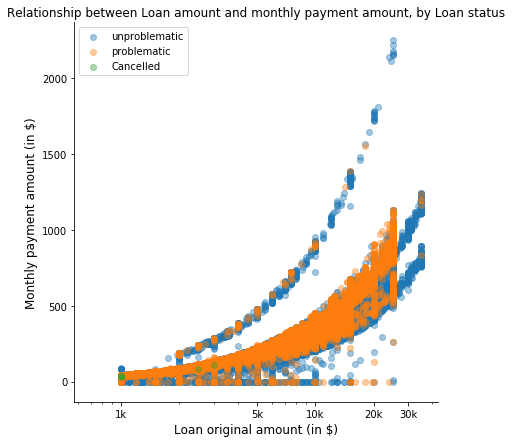

In [22]:
g= sb.FacetGrid(data = df_clean, hue= 'loan_status_binary', size = 6)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment', alpha= 0.4)
g.set(xscale= 'log')
plt.xticks([1000, 5000, 10000, 20000, 30000], ['1k', '5k', '10k', '20k', '30k'])
plt.title('Relationship between Loan amount and monthly payment amount, by Loan status')
plt.xlabel('Loan original amount (in $)', size = 12)
plt.ylabel('Monthly payment amount (in $)', size = 12)
plt.legend();

It appears that both problematic and unproblematic loans follow the same pattern.

#### 2. Is the relationship between loan amount and monthly payment different for problematic and unproblematic loans, based on the employment status of the borrower?

In [23]:
df_clean_sub= df_clean.query('loan_status_binary == "unproblematic" or loan_status_binary == "problematic"')
df_clean_sub.loan_status_binary.value_counts()

unproblematic    94855
problematic      19077
Name: loan_status_binary, dtype: int64

In [24]:
#formula to differentiate employment status
def employ_status(col):
    if col['EmploymentStatus'] == "Employed" or col['EmploymentStatus'] == "Full-time" or col['EmploymentStatus'] == "Self-employed" or col['EmploymentStatus'] == "Part-time":
        val= "Employed"
    elif col['EmploymentStatus'] == "Not available" or col['EmploymentStatus'] == "Other":
        val= "Other"
    elif col['EmploymentStatus'] == "Not employed":
        val= "Unemployed"
    elif col['EmploymentStatus'] == "Retired":
        val= "Retired"
    else:
        val= np.nan
    return val

In [25]:
df_clean_sub['employment'] = df_clean_sub.apply(employ_status, axis= 1)

In [26]:
df_clean_sub.employment.value_counts()

Employed      100898
Other           9152
Unemployed       835
Retired          795
Name: employment, dtype: int64

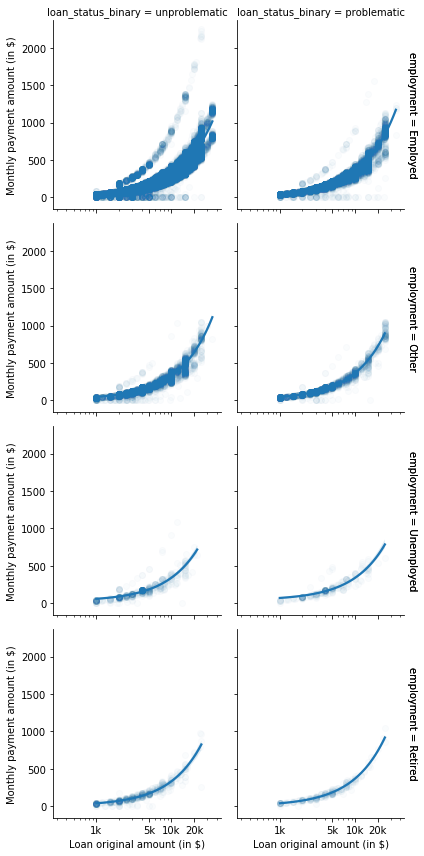

In [27]:
g= sb.FacetGrid(data= df_clean_sub, col= 'loan_status_binary', row= 'employment', margin_titles= True)
g.map(sb.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', fit_reg= True,  y_jitter = 0.04,
      scatter_kws = {'alpha' : 1/50})
g.set(xscale= 'log')
g.set_ylabels('Monthly payment amount (in $)')
g.set_xlabels('Loan original amount (in $)')
g.set_titles('{col_name}')
plt.xticks([1000, 5000, 10000, 20000], ['1k', '5k', '10k', '20k']);

There seems to be no difference in the relationship between loan amount and monthly payment for unproblematic loans and problematic loans for the employment types. <br>

Might be interesting to look at machine learning models to predict if a loan might be problematic.

### Explanatory analysis

#### 1.Which factors affect the borrower’s interest rate?

#### 1a. What affects the borrower’s interest rate? - employment status, public record, deliquencies, home ownership, debt to income ratio, income.

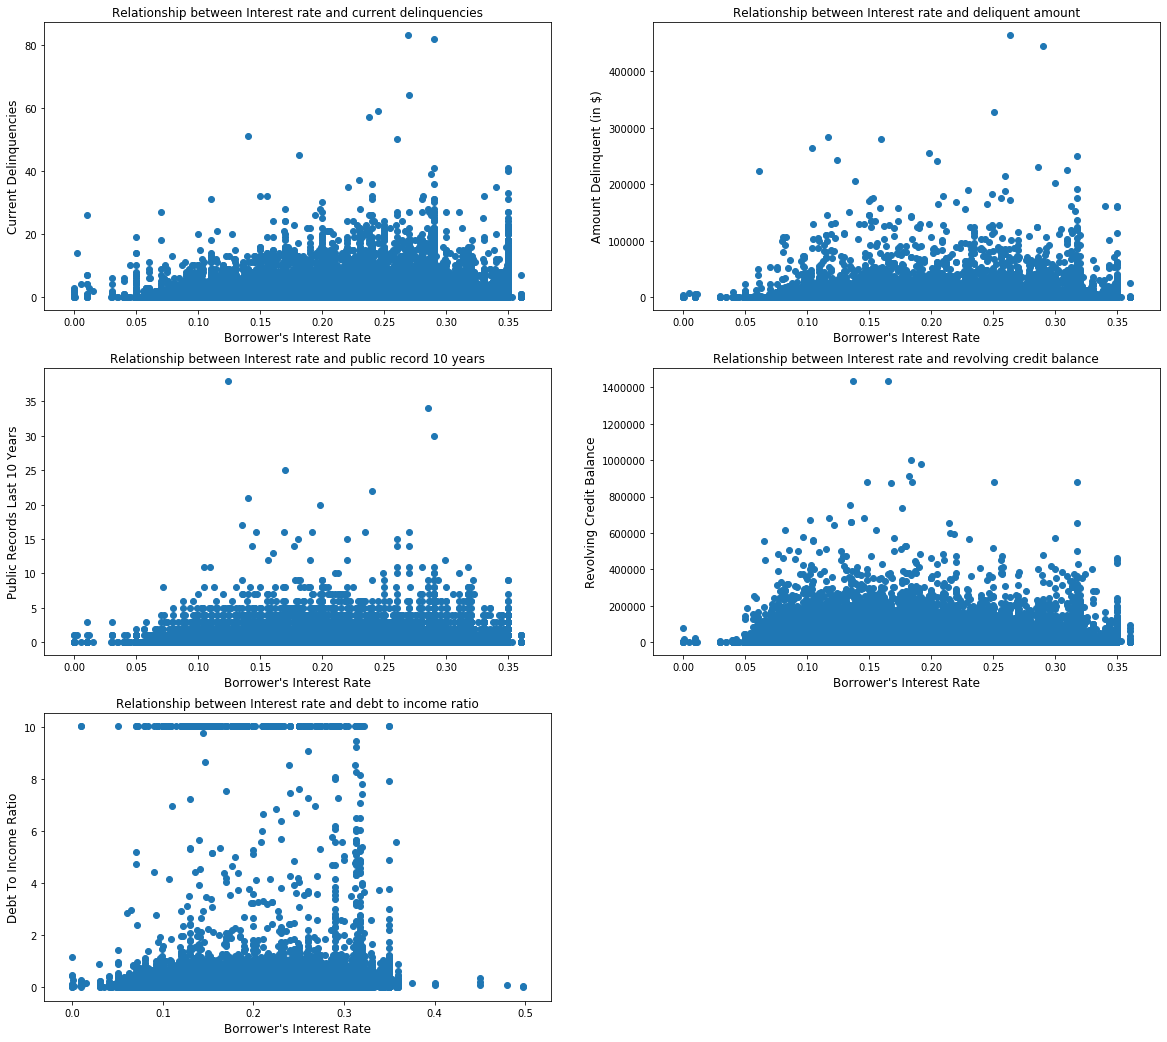

In [28]:
plt.figure(figsize=(20,18))

plt.subplot(3, 2, 1, title= 'Relationship between Interest rate and current delinquencies')
plt.scatter(data= df_clean, x='BorrowerRate', y= 'CurrentDelinquencies')
plt.xlabel('Borrower\'s Interest Rate', size=12)
plt.ylabel('Current Delinquencies', size=12)

plt.subplot(3, 2, 2, title= 'Relationship between Interest rate and deliquent amount')
plt.scatter(data= df_clean, x='BorrowerRate', y= 'AmountDelinquent')
plt.xlabel('Borrower\'s Interest Rate', size=12)
plt.ylabel('Amount Delinquent (in $)', size=12)

plt.subplot(3, 2, 3, title= 'Relationship between Interest rate and public record 10 years')
plt.scatter(data= df_clean, x='BorrowerRate', y= 'PublicRecordsLast10Years')
plt.xlabel('Borrower\'s Interest Rate', size=12)
plt.ylabel('Public Records Last 10 Years', size=12)

plt.subplot(3, 2, 4, title= 'Relationship between Interest rate and revolving credit balance')
plt.scatter(data= df_clean, x='BorrowerRate', y= 'RevolvingCreditBalance')
plt.xlabel('Borrower\'s Interest Rate', size=12)
plt.ylabel('Revolving Credit Balance', size=12)

plt.subplot(3, 2, 5, title= 'Relationship between Interest rate and debt to income ratio')
plt.scatter(data= df_clean, x='BorrowerRate', y= 'DebtToIncomeRatio')
plt.xlabel('Borrower\'s Interest Rate', size=12)
plt.ylabel('Debt To Income Ratio', size=12);

No visible relationship between the borrower's interest rate and factors like debt to income ratio, number of deliquencies, revolving credit balance and public record.

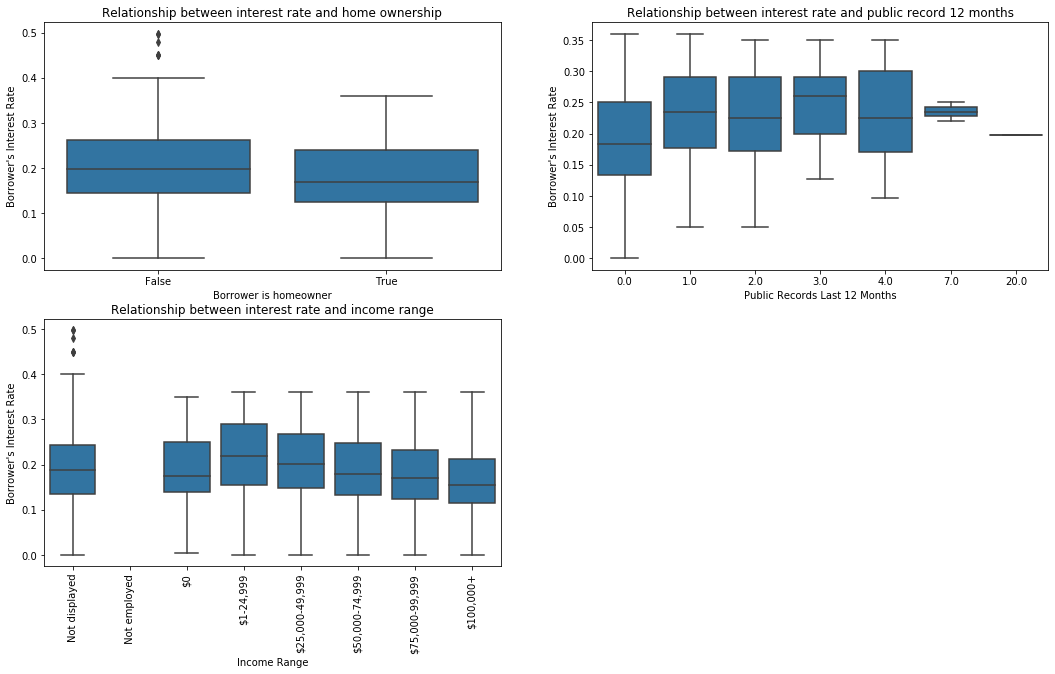

In [29]:
basecolor= sb.color_palette()[0]
plt.figure(figsize=(18,10))
plt.subplot(2, 2, 1)
sb.boxplot(data= df_clean, x= 'IsBorrowerHomeowner', y='BorrowerRate', color= basecolor)
plt.ylabel('Borrower\'s Interest Rate')
plt.xlabel('Borrower is homeowner')
plt.title('Relationship between interest rate and home ownership')

plt.subplot(2, 2, 2)
sb.boxplot(data= df_clean, x= 'PublicRecordsLast12Months', y='BorrowerRate', color= basecolor)
plt.ylabel('Borrower\'s Interest Rate')
plt.xlabel('Public Records Last 12 Months')
plt.title('Relationship between interest rate and public record 12 months')

plt.subplot(2, 2, 3)
sb.boxplot(data= df_clean, x= 'IncomeRange', y='BorrowerRate', color= basecolor)
plt.xticks(rotation= 90)
plt.ylabel('Borrower\'s Interest Rate')
plt.xlabel('Income Range')
plt.title('Relationship between interest rate and income range');

- It appears that home owners have lower interest rates that those who do not own homes.
- It appears that the median interest rate for those with no public records is lower than for those with public records.
- It appears that interest rates decrease with income ranges.

#### 1b. Relationship between interest rate and credit score
- I expect lower credit scores to  be associated with higher interest rates [source](https://bettermoneyhabits.bankofamerica.com/en/home-ownership/how-credit-affects-interest-rate#:~:text=A%20higher%20score%20increases%20a,mortgage%20interest%20rates%20and%20fees.&text=On%20the%20other%20hand%2C%20a,interest%20rates%20may%20be%20higher.)

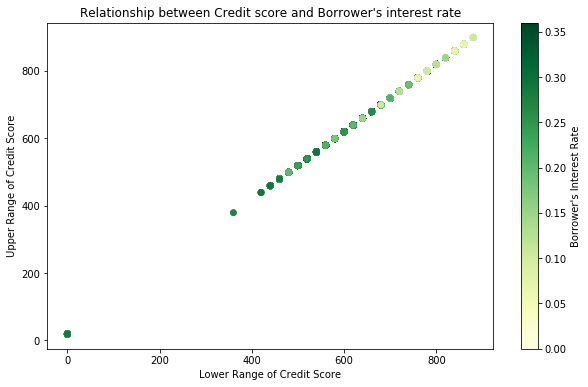

In [30]:
plt.figure(figsize= (10,6))
plt.scatter(data= df_clean, x= 'CreditScoreRangeLower', y= 'CreditScoreRangeUpper', 
            c= 'BorrowerRate', cmap= 'YlGn')
plt.colorbar(label= 'Borrower\'s Interest Rate')
plt.title('Relationship between Credit score and Borrower\'s interest rate')
plt.xlabel('Lower Range of Credit Score')
plt.ylabel('Upper Range of Credit Score');

We can easily see from this graph, that those with higher credit scores have lower interest rates, which is as expected. This is evident from the increase in the depth of the color as we move to lower credit score ranges.

#### 2. Factors that affect the ability of borrowers to close loans
Just like above, I use the loan status to divide the loans by their abilities to be closed, and name them "Problematic" and "Unproblematic" loans.

 #### 2a. Does income affect ability to close?

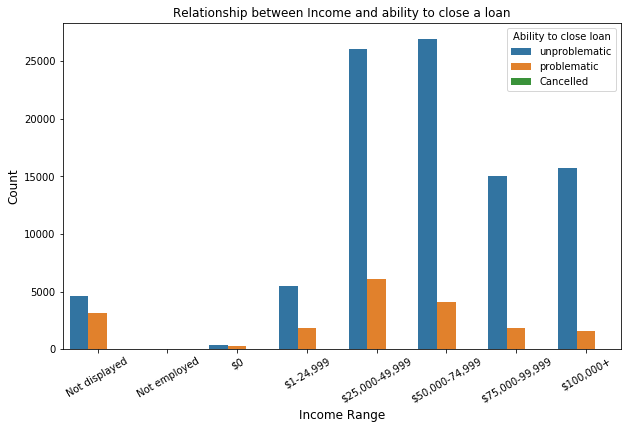

In [31]:
plt.figure(figsize= (10,6))
ax= sb.countplot(data= df_clean, x= 'IncomeRange', hue= 'loan_status_binary')
plt.title('Relationship between Income and ability to close a loan')
plt.xlabel('Income Range', size=12)
plt.ylabel('Count', size= 12)
plt.xticks(rotation= 30)
ax.legend(title= 'Ability to close loan');

In [32]:
#Heatmap
ct_counts= df_clean.groupby(['IncomeRange', 'loan_status_binary']).size()
ct_counts= ct_counts.reset_index(name= 'count')
ct_counts= ct_counts.pivot(index='IncomeRange', columns= 'loan_status_binary', values= 'count')
ct_counts

loan_status_binary,Cancelled,problematic,unproblematic
IncomeRange,,,
Not displayed,4,3127,4610
Not employed,0,0,0
$0,0,240,381
"$1-24,999",0,1816,5458
"$25,000-49,999",1,6140,26051
"$50,000-74,999",0,4089,26961
"$75,000-99,999",0,1837,15079
"$100,000+",0,1595,15742


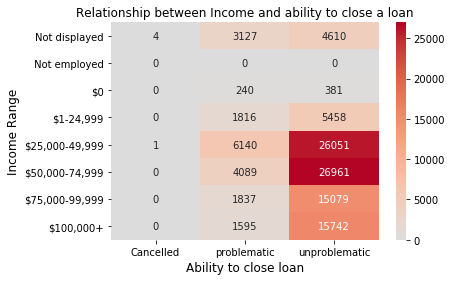

In [39]:
sb.heatmap(ct_counts, annot= True, fmt= '.0f', cmap = 'coolwarm', center = 0)
plt.title('Relationship between Income and ability to close a loan')
plt.xlabel('Ability to close loan', size= 12)
plt.ylabel('Income Range', size=12);

- In general, the amount of problematic loans are way less than the unproblematic loans (loans with status - final payment in progress, completed or current)
- $25,000-49,999 is the income range with the highest proportion of problematic loans, but this is also the most frequent income range.

#### 2b. Relationship between interest rate and ability to close

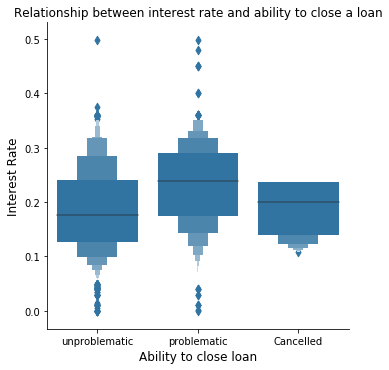

In [34]:
basecolor = sb.color_palette()[0]
sb.catplot(data= df_clean, x= 'loan_status_binary', y= 'BorrowerRate', color= basecolor, kind= "boxen")
plt.title('Relationship between interest rate and ability to close a loan')
plt.xlabel('Ability to close loan', size= 12)
plt.ylabel('Interest Rate', size=12);

It appears that the interest rates for the loans that were problematic to close were higher than for those that are unproblematic.

#### 2c. Relationship between credit score and ability to close
The above graph suggests that the credit scores for the problematic loans will also be worse

In [35]:
#get the average credit score
#Looking at the values of the credit scores with groupby, I can take the average and it 
#would still reflect that those with higher scores have good credit and vice versa

df_clean_sub= df_clean.loc[:, ['CreditScoreRangeLower', 'CreditScoreRangeUpper', 'loan_status_binary']].query('loan_status_binary == "unproblematic" or loan_status_binary == "problematic"')
df_clean_sub['AverageCreditScore']= df_clean_sub[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)
df_clean_sub.loan_status_binary.value_counts()

unproblematic    94855
problematic      19077
Name: loan_status_binary, dtype: int64

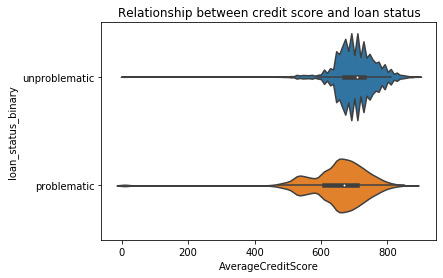

In [40]:
#plot
sb.violinplot(data=df_clean_sub, x= 'AverageCreditScore', y='loan_status_binary')
plt.title('Relationship between credit score and loan status');

The loans that are problematic to close have more borrowers with lower/ worse credit scores than the loans that are unproblematic.

## Main_findings

1. Which factors affect the borrower’s interest rate?
    - Home owners have lower interest rates that those who do not own homes.
    - The median interest rate for those with no public records is lower than for those with public records.
    - It appears that interest rates decrease with income ranges.
    - Those with higher credit scores have lower interest rates
    - Public records, deliquencies and income to debt ratio do not seem to have any relationship with the interest rate of the borrower.<br><br>
2. Which factors affect the ability of borrowers to close loans?
    - Higher interest rates are associated with the loans that are problematic to close
    - The loans that are problematic to close have more borrowers with lower/ worse credit scores than the loans that are unproblematic

#### The End